<a href="https://colab.research.google.com/github/ooluwaseunabel/ANZ-Project/blob/master/Exploratory%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
For this part of EDA i will be using a dataset called UK bank Customers i got this dataset form Kaggle, here is the link https://www.kaggle.com/ukveteran/uk-bank-customers

This Bank doesn't have a name but i will like to call it Famous Bank. I will be running analysis using this data, will like to explore in bits by bits using `python` and some of python libraries such as `pandas`, `seaborn` and `matplotlib`.

What is my aim you may ask? Well i just want to get my hands dirty, practice what i have been learning for a while and improve my skills.
The theme of this article is `Saving Habits of Famous Bank Customers`. 

Let me tell you a little about this dataset

This data has `9` Columns and `4014` rows. Well the data has no missing values.

Let's Go....

In [ ]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
pd.set_option("display.max_rows", None)
%matplotlib inline

In [ ]:
# bring in the data
bank = pd.read_csv("P6-UK-Bank-Customers.csv")

In [ ]:
bank.head()

,Customer ID,Name,Surname,Gender,Age,Region,Job Classification,Date Joined,Balance
0,100000001,Simon,Walsh,Male,21,England,White Collar,05.Jan.15,113810.15
1,400000002,Jasmine,Miller,Female,34,Northern Ireland,Blue Collar,06.Jan.15,36919.73
2,100000003,Liam,Brown,Male,46,England,White Collar,07.Jan.15,101536.83
3,300000004,Trevor,Parr,Male,32,Wales,White Collar,08.Jan.15,1421.52
4,100000005,Deirdre,Pullman,Female,38,England,Blue Collar,09.Jan.15,35639.79


In [ ]:
bank.shape

(4014, 9)

In [ ]:
bank['Age'].max()

64

In [ ]:
bank['Age'].min()

15

In [ ]:
bank.isnull().sum()

Customer ID           0
Name                  0
Surname               0
Gender                0
Age                   0
Region                0
Job Classification    0
Date Joined           0
Balance               0
dtype: int64

### Data Preprocessing

In [ ]:
# Let's group the age values

bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
labels = ['15-19','20-24', '25-29','30-34','35-39', '40-44', '45-49','50-54','55-59','60-64','65-69']
bank['Age_range'] = pd.cut(bank['Age'], bins, labels = labels,include_lowest = True)

In [ ]:
bank =bank.drop('Age', axis = 1)

In [ ]:
bank.head()

,Customer ID,Name,Surname,Gender,Region,Job Classification,Date Joined,Balance,Age_range
0,100000001,Simon,Walsh,Male,England,White Collar,05.Jan.15,113810.15,20-24
1,400000002,Jasmine,Miller,Female,Northern Ireland,Blue Collar,06.Jan.15,36919.73,30-34
2,100000003,Liam,Brown,Male,England,White Collar,07.Jan.15,101536.83,45-49
3,300000004,Trevor,Parr,Male,Wales,White Collar,08.Jan.15,1421.52,30-34
4,100000005,Deirdre,Pullman,Female,England,Blue Collar,09.Jan.15,35639.79,35-39


In [ ]:
gender_count = bank.groupby('Gender')

In [ ]:
d2 = gender_count['Gender'].count().to_frame(name = 'Gender_counts').reset_index()

In [ ]:
d2

,Gender,Gender_counts
0,Female,1849
1,Male,2165


Text(0.5, 1.0, 'Gender vs Gender Count')

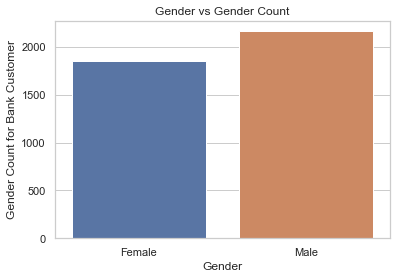

In [ ]:
sns.barplot(x = 'Gender', y= 'Gender_counts', data =d2)
plt.xlabel('Gender')
plt.ylabel('Gender Count for Bank Customer')
plt.title('Gender vs Gender Count')

In [ ]:
# Let's visualise the region were the customers are from
Region_count = bank.groupby('Region')
R1 = Region_count['Region'].count().to_frame(name = 'Region_counts').reset_index()

Text(0.5, 1.0, 'Region vs Region Count')

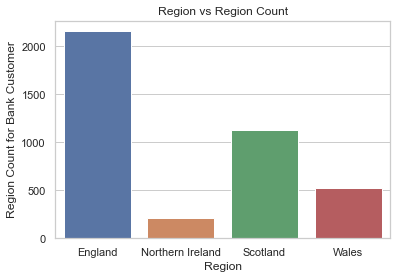

In [ ]:
sns.barplot(x = 'Region', y= 'Region_counts', data =R1)
# plt.xlabel('Gender')
plt.ylabel('Region Count for Bank Customer')
plt.title('Region vs Region Count')

From the visualization above we can see that the higest bank customer come from England, followed by Scotland, Wales and Northern Ireland.

In [ ]:
# Let's visualise the Job Classification were the customers are from
Job_count = bank.groupby('Job Classification')
Jb = Job_count['Job Classification'].count().to_frame(name = 'Job Classification_counts').reset_index()

Text(0.5, 1.0, 'Job Classification vs Count')

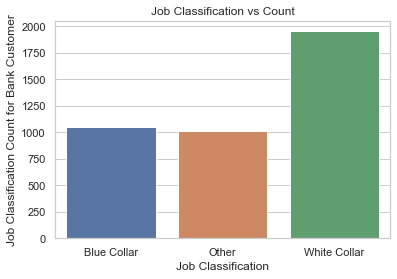

In [ ]:
sns.barplot(x = 'Job Classification', y= 'Job Classification_counts', data =Jb)
plt.ylabel('Job Classification Count for Bank Customer')
plt.title('Job Classification vs Count')

From the chart above we can conclude that majority of Famous bank customers belong to `white collar` Job classification

In [ ]:
# sns.barplot('Age', 'Purchase', hue='Gender', data=final_df)

In [ ]:
age=bank.groupby(['Gender','Age_range']).size().reset_index().rename(columns={0:'Age_count'})

In [ ]:
age

,Gender,Age_range,Age_count
0,Female,15-19,39
1,Female,20-24,137
2,Female,25-29,274
3,Female,30-34,434
4,Female,35-39,389
5,Female,40-44,262
6,Female,45-49,139
7,Female,50-54,96
8,Female,55-59,63
9,Female,60-64,16


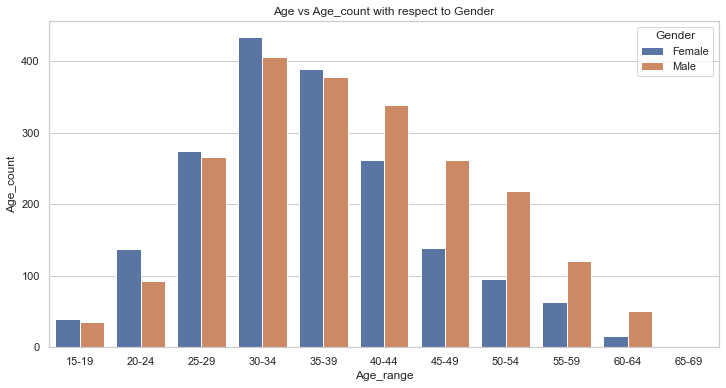

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Age_range",y="Age_count", hue = "Gender",data=age);
plt.title('Age vs Age_count with respect to Gender');

In the chat above we are looking at the age_range and count with respect to gender and we can see that the highest age range `30-34` has more female than male. From this chat can we conclude that Famous Bank has more female customers than male? Well i don't think so, let find out the answer below

In [ ]:
gender=bank.groupby('Gender').size().reset_index().rename(columns={0:'gender_count'})

In [ ]:
gender

,Gender,gender_count
0,Female,1849
1,Male,2165


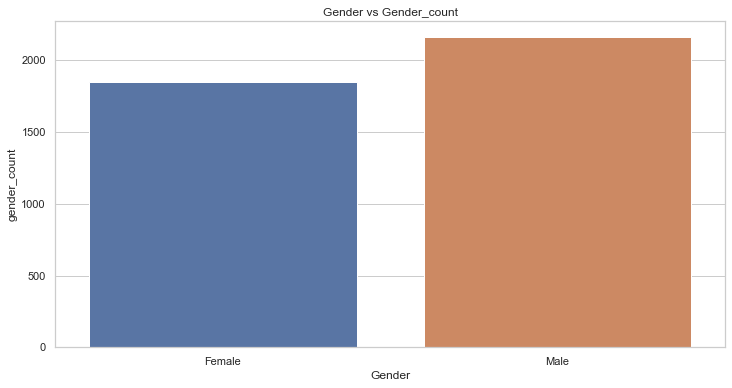

In [ ]:
sns.barplot(x="Gender",y="gender_count",data=gender);
plt.title('Gender vs Gender_count');

In `Age vs Age_count`chat with respect to age_range between `30-34` i asked `can we conclude that Famous Bank has more female customers than male customers?`. The answer to that question is No. From the chat above we can we see that Famous Bank has more Male customers than female customers that is `2165` and `1849` respectively

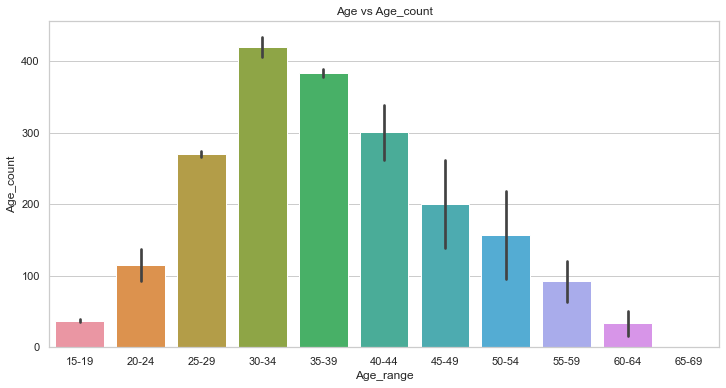

In [ ]:
sns.barplot(x="Age_range",y="Age_count",data=age);
plt.title('Age vs Age_count');

In the chat above we are trying to see the highest age range banking with Famous Bank. And from the chat we can see that customers between the age range of `30-34` banks more with Famous bank followed by age range of `35-39`.

In [ ]:
AJ = bank[['Age_range','Job Classification']].groupby(['Age_range','Job Classification']).size().reset_index().rename(columns={0:'AJ_count'})

In [ ]:
AJ

,Age_range,Job Classification,AJ_count
0,15-19,Blue Collar,14
1,15-19,Other,19
2,15-19,White Collar,41
3,20-24,Blue Collar,44
4,20-24,Other,54
5,20-24,White Collar,131
6,25-29,Blue Collar,108
7,25-29,Other,100
8,25-29,White Collar,332
9,30-34,Blue Collar,163


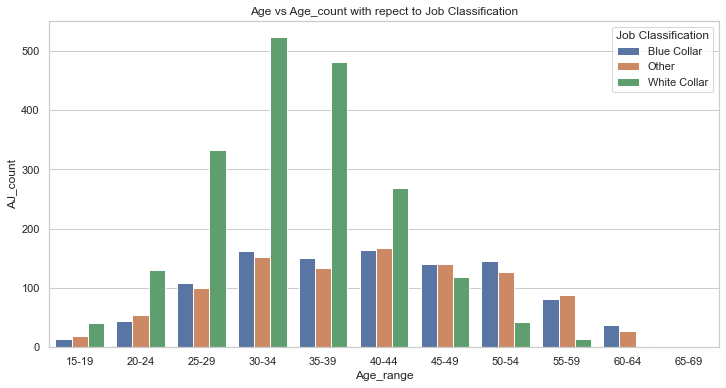

In [ ]:
sns.barplot(x="Age_range",y="AJ_count", hue = "Job Classification",data=AJ);
plt.title('Age vs Age_count with repect to Job Classification');

From this data we can say that white collar jobs dominates most of the age ranges eg `20-24, 25-29, 30-34, 35-39, 40-44` etc

In [ ]:
Jobs = bank[['Region','Job Classification']].groupby(['Region','Job Classification']).size().reset_index().rename(columns={0:'counts'})

In [ ]:
Jobs

,Region,Job Classification,counts
0,England,Blue Collar,344
1,England,Other,314
2,England,White Collar,1501
3,Northern Ireland,Blue Collar,41
4,Northern Ireland,Other,105
5,Northern Ireland,White Collar,65
6,Scotland,Blue Collar,544
7,Scotland,Other,496
8,Scotland,White Collar,84
9,Wales,Blue Collar,120


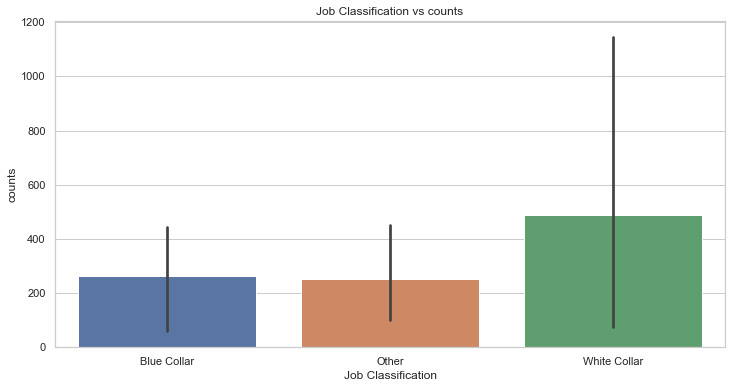

In [ ]:
sns.barplot(x="Job Classification",y="counts",data=Jobs);
plt.title('Job Classification vs counts');

Famous Bank has more of white collar Job Customers

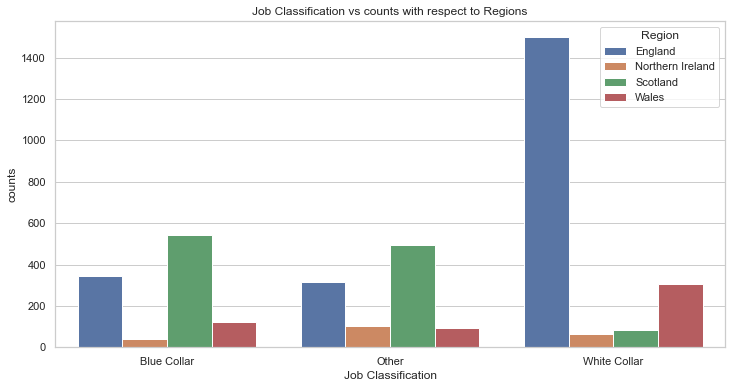

In [ ]:
sns.barplot(x="Job Classification",y="counts",hue = 'Region',data=Jobs);
plt.title('Job Classification vs counts with respect to Regions');

From the above chart we can notice the following:
1. Famous Bank has highest customers in England working with white collar Jobs
2. Famous Bank has more customers in England and Scotland
3. Famous bank has less customers from Northern Ireland and Wales, so if they are looking for regions to expand their business Wales and Northern is the best place to go

In [ ]:
#let's look at the balance for each of the regions
balance= bank.groupby(['Region', 'Gender'])['Balance'].sum().reset_index()

In [ ]:
balance

,Region,Gender,Balance
0,England,Female,43627976.64
1,England,Male,41205420.36
2,Northern Ireland,Female,6086799.50
3,Northern Ireland,Male,2248766.89
4,Scotland,Female,11900747.68
5,Scotland,Male,32509983.04
6,Wales,Female,11368010.25
7,Wales,Male,10674819.01


From the table above, we can see that England has over 84 million. So there is no doubt when the data said that Famous Bank has the highest customers coming from England. Let's plot it in a barchat

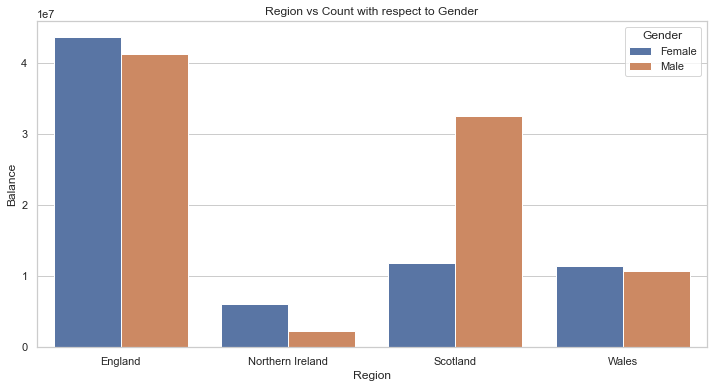

In [ ]:
sns.barplot(x="Region",y="Balance",hue = 'Gender',data=balance);
plt.title('Region vs Count with respect to Gender');

My observation from the chart above:
1. Female customers has the highest balance in England, Northern Ireland and Wales.
2. Male customers has the highest balance in Scotland

In [ ]:
bal_age= bank.groupby('Age_range')['Balance'].sum().reset_index()

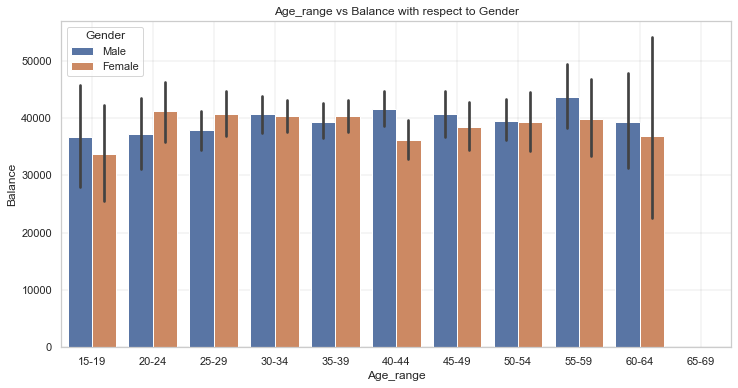

In [ ]:
ax = sns.barplot(x="Age_range",y="Balance",hue= 'Gender',data=bank);
plt.title('Age_range vs Balance with respect to Gender');

ax.grid(visible=True, which='major', color='black', linewidth=0.075)
ax.grid(visible=True, which='minor', color='black', linewidth=0.075)
plt.show()

From the chart above, we can see that the age range with the higest balance is in `55-59` followed by `40-44`.

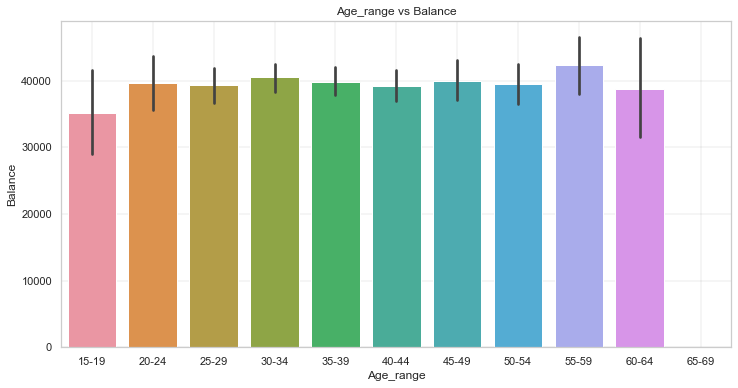

In [ ]:
ax = sns.barplot(x="Age_range",y="Balance",data=bank);
plt.title('Age_range vs Balance');

ax.grid(visible=True, which='major', color='black', linewidth=0.075)
ax.grid(visible=True, which='minor', color='black', linewidth=0.075)
plt.show()